## Объявляем библиотеки

In [2]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Скачиваем и визуализируем данные

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

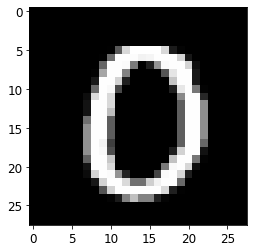

In [ ]:
plt.imshow(X_train[10], cmap='gray')
plt.show()

## Обучаем полносвязную нейронную сеть

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6073 - accuracy: 0.8443 - val_loss: 0.3012 - val_accuracy: 0.9180
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2841 - accuracy: 0.9193 - val_loss: 0.2321 - val_accuracy: 0.9376
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9342 - val_loss: 0.1990 - val_accuracy: 0.9448
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1970 - accuracy: 0.9448 - val_loss: 0.1803 - val_accuracy: 0.9500
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1714 - accuracy: 0.9513 - val_loss: 0.1553 - val_accuracy: 0.9564


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1603 - accuracy: 0.9521


[0.16034121811389923, 0.9520999789237976]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]],
      dtype=float32)

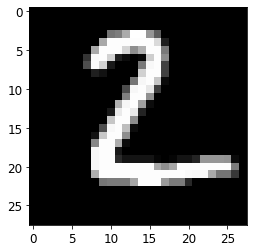

In [ ]:
plt.imshow(X_test[1], cmap='gray')
plt.show()

## Обучаем сверточную нейронную сеть

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [3]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/5
1719/1719 [==============================] - 23s 9ms/step - loss: 0.3407 - accuracy: 0.8985 - val_loss: 0.0551 - val_accuracy: 0.9878
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.0958 - accuracy: 0.9777 - val_loss: 0.0478 - val_accuracy: 0.9886
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.0774 - accuracy: 0.9831 - val_loss: 0.0397 - val_accuracy: 0.9904
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.0675 - accuracy: 0.9843 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9924


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9924


[0.029964538291096687, 0.9923999905586243]

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 206ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

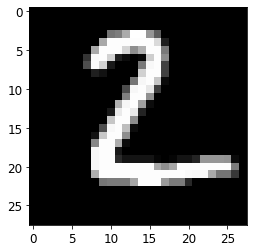

In [ ]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')
plt.show()

## Домашнее задание

Подобрать гиперпараметры сверточной нейронной сети и обучить ее для датасета CIFAR10 (keras.datasets.cifar10). Сравнить точность ее работы с полносвязной нейронной сетью. Лучше сделать в google colab и подключить использование GPU.

In [4]:
cifar10 = keras.datasets.cifar10

(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [55]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

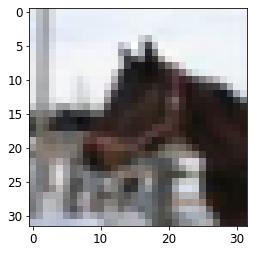

In [54]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [65]:
X_train.shape

(45000, 32, 32, 3)

In [6]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])


In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 19s 6ms/step - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3030 - val_accuracy: 0.0976
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3032 - val_accuracy: 0.0996
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3025 - val_accuracy: 0.1040
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3028 - val_a

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302675724029541, 0.10000000149011612]

In [50]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [49]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [9]:
#поменяем параметры модели

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9697 - accuracy: 0.2435 - val_loss: 1.5816 - val_accuracy: 0.3930
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6367 - accuracy: 0.3717 - val_loss: 1.3892 - val_accuracy: 0.4836
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4806 - accuracy: 0.4463 - val_loss: 1.3646 - val_accuracy: 0.5120
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3675 - accuracy: 0.5017 - val_loss: 1.2135 - val_accuracy: 0.5762
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2912 - accuracy: 0.5416 - val_loss: 1.1053 - val_accuracy: 0.6096
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2150 - accuracy: 0.5718 - val_loss: 1.1161 - val_accuracy: 0.6164
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1483 - accuracy: 0.5986 - val_loss: 1.0491 - val_ac

In [11]:
score

[1.7776151895523071, 0.7009999752044678]

Уже намного лучше. accuracy=0.7
Поменяем немного архитектуру сети

In [12]:
#убрали два слоя
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8608 - accuracy: 0.2923 - val_loss: 1.4783 - val_accuracy: 0.4600
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5221 - accuracy: 0.4314 - val_loss: 1.2980 - val_accuracy: 0.5522
Epoch 3/100
1407/1407 [==============================] - 6s 5ms/step - loss: 1.3746 - accuracy: 0.4933 - val_loss: 1.1808 - val_accuracy: 0.5962
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2802 - accuracy: 0.5334 - val_loss: 1.0402 - val_accuracy: 0.6398
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2105 - accuracy: 0.5679 - val_loss: 1.0637 - val_accuracy: 0.6432
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1563 - accuracy: 0.5864 - val_loss: 0.9725 - val_accuracy: 0.6644
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1027 - accuracy: 0.6070 - val_loss: 0.9779 - val_ac

In [15]:
score

[1.4686088562011719, 0.7185999751091003]

уже лучше получилось. Наконец, еще немного подредактируем нашу сеть

In [16]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.9186 - accuracy: 0.2727 - val_loss: 1.5368 - val_accuracy: 0.4508
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5074 - accuracy: 0.4514 - val_loss: 1.2514 - val_accuracy: 0.5504
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3047 - accuracy: 0.5372 - val_loss: 1.0953 - val_accuracy: 0.6208
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1575 - accuracy: 0.5958 - val_loss: 1.0216 - val_accuracy: 0.6478
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0604 - accuracy: 0.6318 - val_loss: 1.0813 - val_accuracy: 0.6208
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9746 - accuracy: 0.6642 - val_loss: 0.9447 - val_accuracy: 0.6736
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9090 - accuracy: 0.6886 - val_loss: 0.8845 -

In [18]:
score

[1.905427098274231, 0.733299970626831]

Вышло лучше. Накидаем туда еще скрытых слоев

In [22]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.0256 - accuracy: 0.1932 - val_loss: 1.7367 - val_accuracy: 0.3230
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6884 - accuracy: 0.3448 - val_loss: 1.4635 - val_accuracy: 0.4438
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4847 - accuracy: 0.4466 - val_loss: 1.2984 - val_accuracy: 0.5302
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3658 - accuracy: 0.5092 - val_loss: 1.1908 - val_accuracy: 0.5794
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2570 - accuracy: 0.5562 - val_loss: 1.0953 - val_accuracy: 0.6168
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1900 - accuracy: 0.5872 - val_loss: 1.0622 - val_accuracy: 0.6284
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1139 - accuracy: 0.6156 - val_loss: 1.0107 -

In [24]:
score

[1.1474148035049438, 0.7024000287055969]

Сработало хуже. Теперь обучим полносвязную нейронную сеть

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8852 - accuracy: 0.3212 - val_loss: 1.7272 - val_accuracy: 0.3762
Epoch 2/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6976 - accuracy: 0.3930 - val_loss: 1.6524 - val_accuracy: 0.4124
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6247 - accuracy: 0.4165 - val_loss: 1.6133 - val_accuracy: 0.4192
Epoch 4/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5742 - accuracy: 0.4372 - val_loss: 1.6277 - val_accuracy: 0.4156
Epoch 5/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5366 - accuracy: 0.4506 - val_loss: 1.5592 - val_accuracy: 0.4448
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5067 - accuracy: 0.4600 - val_loss: 1.5636 - val_accuracy: 0.4508
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.4831 - accuracy: 0.4726 - val_loss: 1.5139 - val_ac

In [31]:
score

[1.7020775079727173, 0.478300005197525]

Полносвязная нейронная сеть работает хуже сверточной.